In [1]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import glob

In [2]:
directory = '/Users/willwaalkes/Desktop/APO_Data/Q2CU01/UT210602/'

os.chdir(directory)

flat_dir = 'cals/flats/'
bias_dir = 'cals/biases/'
dark_dir = 'cals/darks/'
science_dir = 'science/'
reduced_dir = 'science/reduced/'

## BIASES

In [3]:
biases = []

for name in glob.glob(bias_dir + '*.fits'):
    
    hdul = fits.open(name)    
    data = hdul[0].data
    biases.append(data)

masterbias = np.median(np.array(biases),axis=0)

std: 8.109926783070053
mean: 442.6939574032738


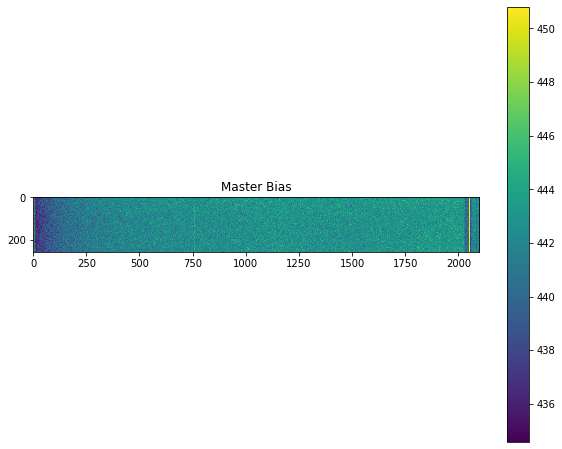

In [4]:
std = np.std(masterbias)
mean = np.mean(masterbias)
    
print(f"std: {std}")
print(f"mean: {mean}")

plt.figure(figsize=(10,8))
plt.imshow((masterbias),vmin=(mean-std),vmax=(mean+std))
plt.title('Master Bias')
plt.colorbar()
plt.show()
plt.close()

## DARKS

In [5]:
darks = []

for name in glob.glob(dark_dir + '*.fits'):
    
    hdul = fits.open(name)    
    data = hdul[0].data
    darks.append(data)


masterdark = np.median(np.array(darks),axis=0)

std: 56.89839768566346
mean: 445.92962332589286


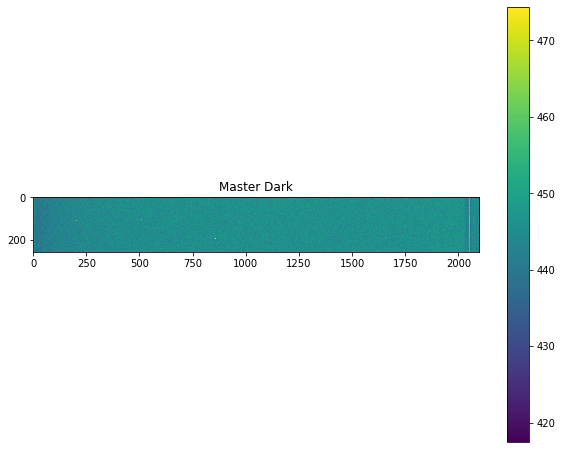

In [6]:
std = np.std(masterdark)
mean = np.mean(masterdark)
    
print(f"std: {std}")
print(f"mean: {mean}")

plt.figure(figsize=(10,8))
plt.imshow((masterdark),vmin=(mean-std/2),vmax=(mean+std/2))
plt.title('Master Dark')
plt.colorbar()
plt.show()
plt.close()

## FLATS

In [10]:
flats = []

for name in glob.glob(flat_dir + '*.fits'):
    
    hdul = fits.open(name)    
    data = hdul[0].data
    data = data - masterbias
    data /= np.median(data)
    flats.append(data)


masterflat = np.median(np.array(flats),axis=0)

std: 0.2386097890705217
mean: 0.9839853642059946


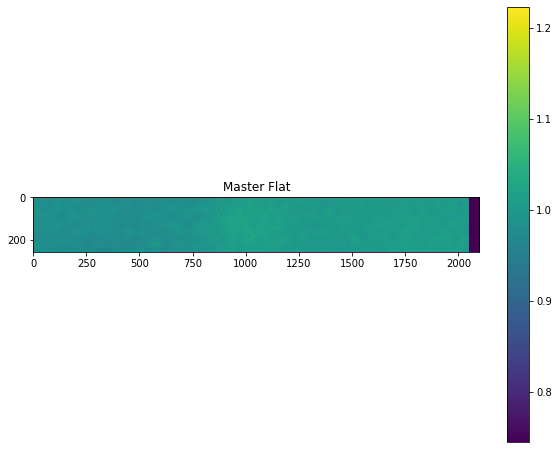

In [11]:
std = np.std(masterflat)
mean = np.mean(masterflat)
    
print(f"std: {std}")
print(f"mean: {mean}")

plt.figure(figsize=(10,8))
plt.imshow((masterflat),vmin=(mean-std),vmax=(mean+std))
plt.title('Master Flat')
plt.colorbar()
plt.show()
plt.close()

## DARK - BIAS

mean: 3.235665922619048


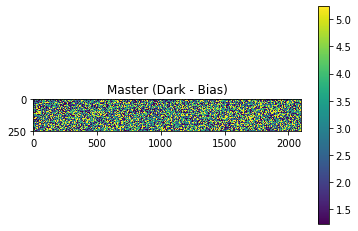

In [13]:
mean = np.mean(masterdark-masterbias)
    
print(f"mean: {mean}")
    
plt.imshow((masterdark-masterbias),vmin=(mean-2),vmax=(mean+2))
plt.title('Master (Dark - Bias)')
plt.colorbar()
plt.show()
plt.close()

## SCIENCE IMAGES

In [15]:
os.chdir(directory + science_dir)

for name in glob.glob('*.fits'):
            
    hdul = fits.open(name)    
    
    hdul[0].data = (hdul[0].data - masterdark)
    hdul[0].data /= masterflat
    
    hdul.writeto('reduced/' + name, overwrite=True)

/Users/willwaalkes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/willwaalkes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
